PHÂN TÍCH PHÂN KHÚC KHÁCH HÀNG NGÂN HÀNG

Bộ dữ liệu này bao gồm hơn 1 triệu giao dịch của hơn 800.000 khách hàng cho một ngân hàng ở Ấn Độ

In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file='/Users/mac/Downloads/bank_transactions.csv'
df=pd.read_csv(file)
df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

A. Phân tích tổng quan của bộ dữ liệu
1. Kiểm tra số lượng giao dịch, số lượng khách hàng, khoảng thời gian dữ liệu.

In [4]:
# Số lượng giao dịch
df.shape[0]

1048567

In [5]:
# Số lượng khách hàng duy nhất
num_customer=df['CustomerID'].nunique()
num_customer

884265

In [6]:
# Chuyển đổi TransactionDate sang định dạng ngày tháng
df['TransactionDate']=pd.to_datetime(df['TransactionDate'], format='%d/%m/%y')
# Khoảng thời gian giao dịch
start_date=df['TransactionDate'].min()
end_date=df['TransactionDate'].max()
print(start_date, end_date)

2016-08-01 00:00:00 2016-10-21 00:00:00


Số lượng giao dịch của bộ dữ liệu là 1048567, số lượng khách hàng là 884265(số lượng khách hàng thực hiện ít nhất 1 giao dịch). Khoảng thời gian giao dịch của dữ liệu từ ngày 01/08/2016 đến ngày 21/10/2016

2. Kiểm tra dữ liệu bị thiếu hoặc bất thường (giá trị âm, sai định dạng...).

In [7]:
df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

Có 4 cột chứa giá trị Na gồm cột CustomerDOB chứa 3397 giá trị Na, CustGender chứa 110 giá trị Na, CustLocation chứa 151 giá trị Na và CustAccountBalance chứa 2369 giá trị Na

In [8]:
# Kiểm tra giá trị âm trong các cột số
negative_values = {
    "CustAccountBalance": (df["CustAccountBalance"] < 0).sum(),
    "TransactionAmount (INR)": (df["TransactionAmount (INR)"] < 0).sum()}
print(negative_values)

{'CustAccountBalance': 0, 'TransactionAmount (INR)': 0}


Không có giá trị âm trong CustAccountBalance và TransactionAmount (INR)

3. Thống kê số dư tài khoản và mức tiền giao dịch của khách hàng

In [9]:
df['CustAccountBalance'].describe()

count    1.046198e+06
mean     1.154035e+05
std      8.464854e+05
min      0.000000e+00
25%      4.721760e+03
50%      1.679218e+04
75%      5.765736e+04
max      1.150355e+08
Name: CustAccountBalance, dtype: float64

Có 1046198 khách hàng có số dư tài khoản hợp lệ(đã lược bỏ những giá trị Na).

Số dư trung bình(mean) của 1 tài khoản khách hàng là 115,403.54INR, độ lệch chuẩn(std) là 846,485.4INR cho thấy số dư khách hàng có sự phân tán lớn, có một số tài khoản có số dư rất cao trong khi đó lại có nhiều tài khoản có số dư thấp.

Giá trị nhỏ nhất(min) và giá trị lớn nhất(max) có sự chênh lệch cao, cho thấy có những khách hàng không có tiền trong tài khoản và ngược lại có một số khách hàng cực giàu.

In [10]:
df['TransactionAmount (INR)'].describe()

count    1.048567e+06
mean     1.574335e+03
std      6.574743e+03
min      0.000000e+00
25%      1.610000e+02
50%      4.590300e+02
75%      1.200000e+03
max      1.560035e+06
Name: TransactionAmount (INR), dtype: float64

Số tiền giao dịch trung bình(mean) là 1,574.34INR, nhưng độ lệch chuẩn(std) là 6,574.74INR cho thấy có nhiều giao dịch nhỏ và một số ít giao dịch lớn.

Nhiều giao dịch có giá trị thấp, vì giá trị Q1=161INR, 25% giao dịch có số tiền dưới mức này.

B. Phân tích hành vi khách hàng
1. Phân phối độ tuổi khách hàng

In [11]:
# chuyển đổi cột CustomerDOB
df['CustomerDOB']=pd.to_datetime(df['CustomerDOB'], format='mixed')
# loại bỏ giá trị na
df_customerDOB=df[df['CustomerDOB'].notna()]

In [12]:
# tính toán số tuổi tại thời điểm giao dịch
df['CustomerAge']=(df['TransactionDate'] - df_customerDOB['CustomerDOB']).dt.days // 365
# Loại bỏ các giá trị tuổi không hợp lệ (âm hoặc quá lớn)
df_customerDOB = df[(df['CustomerAge'] > 0) & (df['CustomerAge'] < 120)]
df_customerDOB['CustomerAge'].describe()

count    882578.000000
mean         28.385101
std           5.184212
min           1.000000
25%          24.000000
50%          28.000000
75%          32.000000
max          41.000000
Name: CustomerAge, dtype: float64

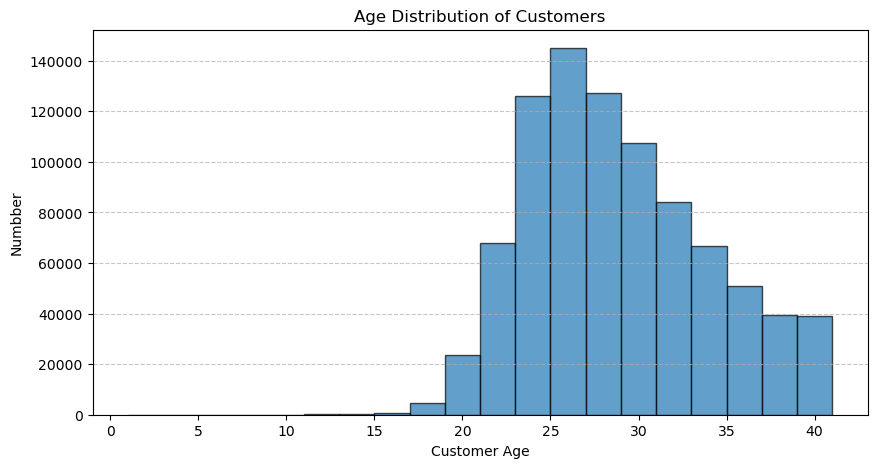

In [13]:
# vẽ biểu đồ Phân phối độ tuổi khách hàng
plt.figure(figsize=(10, 5))
plt.hist(df_customerDOB['CustomerAge'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Customer Age')
plt.ylabel('Numbber')
plt.title('Age Distribution of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Độ tuổi khách hàng tập trung nhiều nhất trong khoảng từ 20-30 tuổi, với đỉnh cao nhất ở khoảng 25 tuổi.

Sau 25 tuổi, số lượng khách hàng giảm dần, đặc biệt giảm nhiều sau 30 tuổi.

Rất ít khách hàng dưới 20 tuổi, điều này có thể thấy do nhóm tuổi này chưa có nhu cầu sử dụng dịch vụ tài chính nhiều hoặc chưa đủ điều kiện để sử dụng tài khoản ngân hàng.

Qua biểu đồ này, ta thấy khách hàng trẻ chiếm ưu thế hơn, phần lớn khách hàng thuộc đổ tuổi 20 đến 30 và có thể là nhóm khách hàng chính mà ngân hàng đang phục vụ. Trong khi đó, nhóm tuổi trên 35 lại giảm đáng kể, cũng có thể thấy do những khách hàng lớn tuổi ít sử dụng dịch vụ ngân hàng trực tuyến hoặc ít thực hiện các giao dịch nhỏ lẻ.

2. Xu hướng giao dịch của khách hàng từ các khu vực

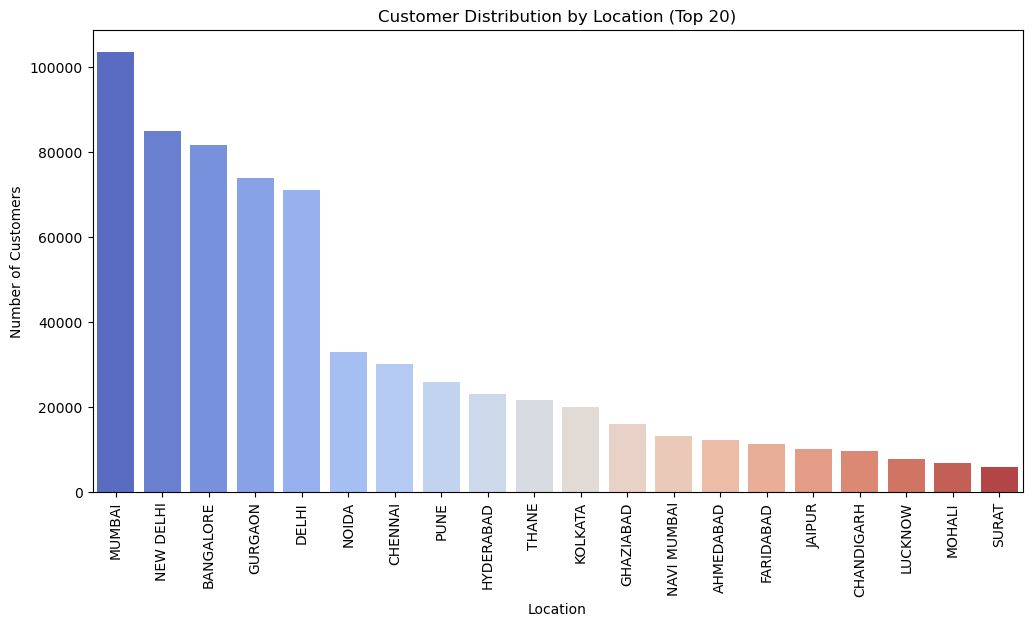

In [14]:
# Loại bỏ giá trị Na
df_location=df[df['CustLocation'].notna()]
# Đếm số lượng khách hàng ở mỗi địa điểm
df_location=df_location['CustLocation'].value_counts()
# Vẽ biểu đồ phân bố khách hàng theo địa điểm
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(12, 6))
sns.barplot(x=df_location.index [:20], y=df_location.values[:20], hue=df_location.index[:20], palette='coolwarm', legend=False)
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution by Location (Top 20)')
plt.show()

Biểu đồ thể hiện sự phân bố số lượng khách hàng theo địa điểm (top 20 địa điểm):
- MUMBAI có số lượng khách hàng cao nhất(103595 khách hàng), vượt trội nhất so với các khu vực khác.
- NEW DELHI, BANGALORE, GURGAON, và DELHI có số lượng khách hàng cũng lớn và không chênh lệch nhau qua nhiều(khoảng từ 70000-85000 khách hàng), cho thấy đây là trung tâm tài chính và kinh tế quan trọng.
- NOIDA, CHENNAI, PUNE, HYDETABAD, THANE và KOLKATA nằm trong nhóm giữa với số lượng khách hàng giảm dần(nằm trong khoảng từ 19000-35000 khách hàng)
- Còn lại gồm GHAZIABAD, NAVI MUMBAI, AHMEDABAD, FARIDABAD, JAIPUR, CHANDIGARH, LUCKNOW, MOHALI, SURAT có số lượng khách hàng cũng giảm dần và thấp hơn nhiều so với MUMBAI.

=> Xu hướng chung các khu vực thành phố lớn có nhiều khách hàng hơn hẳn các đô thị nhỏ.

Qua những dữ liệu này, MUMBAI, NEW DELHI, BANGALORE có thể là thị trường trọng điểm cho ngân hàng hoặc doanh nghiệp tài chính do số lượng khách hàng đông đảo. Các thành phố có ít khách hàng hơn có thể là cơ hội để mở rộng thị trường trong tương lại. Dựa vào những dữ liệu này, ta có thể sử dụng để nhắm mục tiêu quảng cáo, phát triển dịch vụ phù hợp với từng khu vực.

3. Xu hướng thực hiện giao dịch ở các thời điểm trong ngày

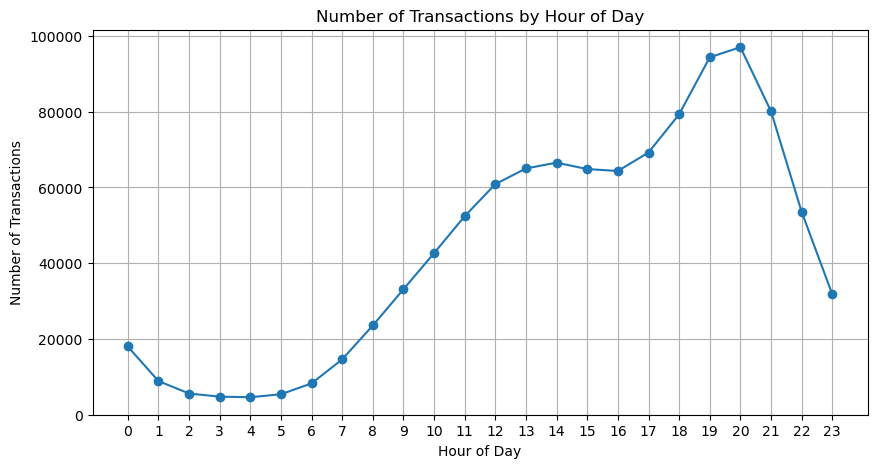

In [15]:
#chuyển đổi TransactionTime sang dạng giờ
df['TransactionHour']=df['TransactionTime'] // 10000
#nhóm dữ liệu theo giớ và đếm số lượng giao dịch
transaction_by_hour=df['TransactionHour'].value_counts().sort_index()
#vẽ biểu đồ số lượng giao dịch theo giờ
plt.figure(figsize=(10, 5))
plt.plot(transaction_by_hour.index, transaction_by_hour.values, marker='o', linestyle='-')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Hour of Day')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

Từ biểu đồ ta thấy:
- Từ 18h đến 21h là khoảng thời gian có số lượng giao dịch cao nhất, đỉnh cao nhất là 20h với 97000 giao dịch do đây có thể là thời gian khách hàng rảnh rỗi sau giờ làm việc.
- Thời điểm giao dịch thấp nhất khoảng 2h đến 5h sáng có rất ít giao dịch, dưới 6000 giao dịch mỗi giờ, do đây là thời gian mà mọi người đang ngủ.
- Xu hướng giao dịch tăng dần trong ngày, giao dịch bắt đầu tăng mạnh từ 7h sáng và đạt đỉnh vào buổi tối. Từ 9h đến 17h, có một lượng giao dịch ổn định, có thể do giao dịch của doanh nghiệp và nhân viên văn phòng.
- Số lượng giao dịch sau 21h bắt đầu giảm mạnh, thời điểm 23h số lượng giao dịch giảm dần gần một nửa so với đỉnh điểm lúc 20h.

Tóm lại, khung giờ cao điểm là 18h-21h có thể là thời gian khách hàng mua sắm trực tuyến, thanh toán hoá đơn hoặc thực hiện các giao dịch cá nhân. Khung giờ thấp từ 2h-5h có thể là giao dịch tự động hoặc rất ít hoạt động từ phía người dùng. Từ những dữ liệu này, ta có thể tối ưu dịch vụ và hiệu suất hệ thống trong các khung giờ cao điểm.

4. Phân phối giới tính khách hàng

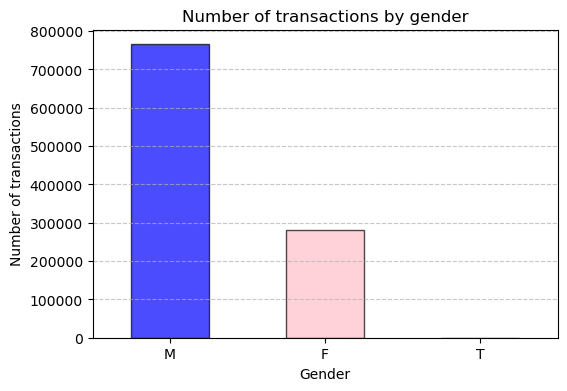

In [16]:
#giới tính
cust_gender=df['CustGender'].value_counts()
# Phân bố giao dịch theo giới tính (vẽ biểu đồ cột để so sánh)
plt.figure(figsize=(6, 4))
cust_gender.plot(kind='bar', color=['blue', 'pink'], edgecolor='black', alpha=0.7)
plt.xlabel('Gender')
plt.ylabel('Number of transactions')
plt.title('Number of transactions by gender')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Từ biểu đồ, ta thấy số lượng giao dịch ở nam(M)(có 765530 giao dịch) là cao nhất, vượt xa hơn so với nữ(F). Nữ(F) có số lượng ít hơn nhiều(có 281936 giao dịch), chỉ khoảng một nửa so với nam. Ngoài ra còn có T có số lượng giao dịch gần như bằng 0, có thể do dữ liệu không đầy đủ hoặc không có khách hàng thuộc nhóm này.

Điều này cho thấy sự khác biệt về giới tính, nam giới có thể thực hiện nhiều giao dịch hơn do thói quen chi tiêu hoặc nghề nghiệp liên quan nhiều đến tài chính. Nữ giới có thể ít giao dịch hơn do khác biệt về tài chính cá nhân hoặc văn hoá ở một số khu vực. 

C. Phân tích dữ liệu theo địa điểm

Như phân tích ở trên, khu vực có nhiều giao dịch nhất là MUMBAI với 103595 khách hàng. Tiếp đến, ta sẽ phân tích sâu hơn về các giá trị giao dịch, số dư tài khoản của khách hàng theo từng khu vực.

1. Tổng giá trị giao dịch theo khu vực

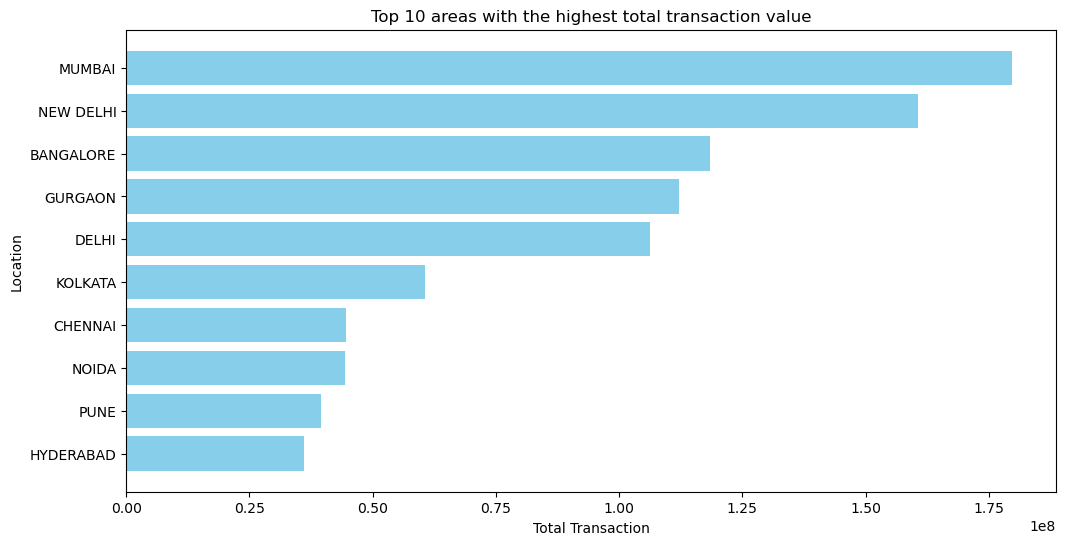

In [17]:
# Tổng giá trị giao dịch theo khu vực
total_transaction_value_by_location=df.groupby('CustLocation')['TransactionAmount (INR)'].sum().reset_index()
# Đổi tên cột
total_transaction_value_by_location.columns=['CustLocation', 'TotalTransactionvalue']
# Sắp xếp dữ liệu giảm dần
total_transaction_value_by_location=total_transaction_value_by_location.sort_values(by='TotalTransactionvalue', ascending=False)
# Vẽ biểu đồ tổng số giao dịch theo khu vực
plt.figure(figsize=(12, 6))
plt.barh(total_transaction_value_by_location['CustLocation'] [:10], 
         total_transaction_value_by_location['TotalTransactionvalue'] [:10], color='skyblue')
plt.xlabel('Total Transaction')
plt.ylabel('Location')
plt.title('Top 10 areas with the highest total transaction value')
plt.gca().invert_yaxis() #đảo ngược trục y để giá trị cáo nhất ở trên cùng
plt.show()

Biểu đồ thể hiện tổng giá trị giao dịch theo khu vực(top 10 khu vực nhiều tổng giá trị giao dịch nhất):
- MUMBAI có số lượng khách hàng cao nhất tương đương với tổng giá trị giao dịch cũng sẽ cao nhất, vượt xa các khu vực khác(khoảng 179.7 triệu INR).
- NEW DELHI đứng thứ hai, cũng có mức giao dịch lớn(khoảng 160.7 triệu INR)
- BANGALORE, GURGAON và DELHI cũng có tổng giá trị giao dịch khá cao, nhưng thấp hơn đáng kể so với MUMBAI và NEW DELHI.
- Khoảng cách giữa MUMBAI và NEW DELHI tuy không quá lớn, nhưng các khu vực còn lại có tổng giá trị giao dịch thấp hơn rõ rệt.

Điều này xảy ra nguyên nhân từ sự khác biệt cũng như tốc độ phát triền của từng khu vực. MUMBAI là trung tâm tài chính của Ấn Độ, có thể có nhiều giao dịch lớn từ doanh nghiệp, ngân hàng và cá nhân. NEW DELHI là thủ đô, có thể có nhiều giao dịch thương mại, chính phủ và doanh nghiệp lớn. BANGALORE là trung tâm công nghệ hàng đầu và startup nên lượng giao dịch cũng khá lớn, GURGAON và DELHI là khu vực phát triển mạnh về thương mại và dịch vụ.

Để biết rõ thêm liệu các khu vực có số lượng giao dịch lớn và tổng số giao dịch lớn thì giá trị của mỗi giao dịch có lớn hay không, ta sẽ phân tích thêm về giá trị giao dịch trung bình của các khu vực.

2. Giá trị trung bình của các khu vực

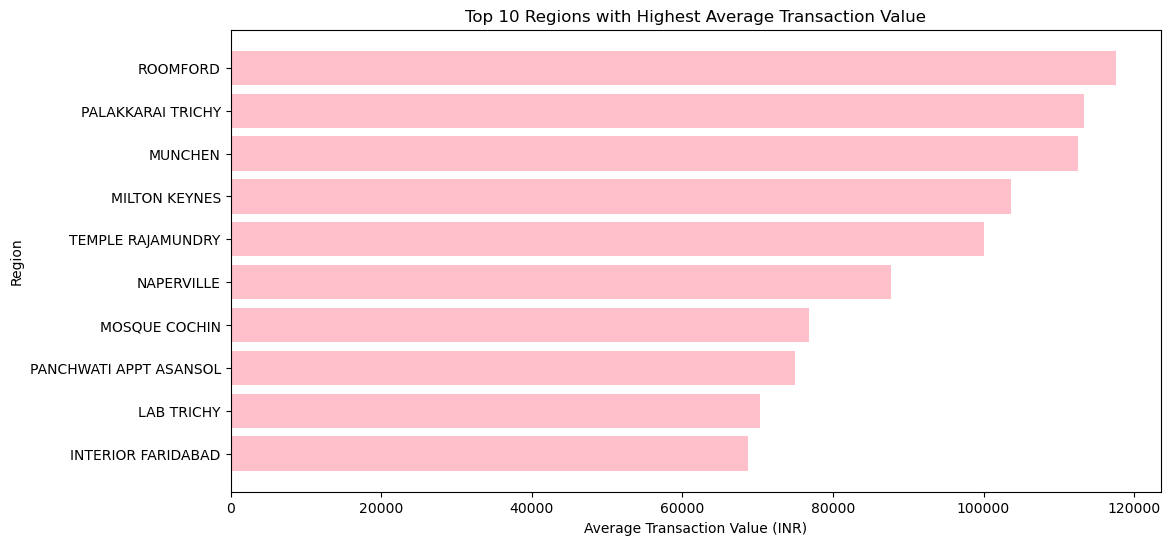

In [18]:
# khu vực có giá trị giao dịch trung bình lớn nhất
top_transaction_location=df.groupby('CustLocation')['TransactionAmount (INR)'].mean().reset_index()
top_transaction_location=top_transaction_location.sort_values(by='TransactionAmount (INR)', ascending=False)
# Vẽ biểu đồ top 10 khu vực có giá trị trung bình cao nhất
plt.figure(figsize=(12, 6))
plt.barh(top_transaction_location['CustLocation'] [:10],
         top_transaction_location['TransactionAmount (INR)'] [:10], color='pink')
plt.xlabel('Average Transaction Value (INR)')
plt.ylabel('Region')
plt.title('Top 10 Regions with Highest Average Transaction Value')
plt.gca().invert_yaxis()
plt.show()

Nhận xét biểu đồ:
- ROOMFORD có giá trị giao dịch trung bình cao nhất (~117,621 INR).
- PALAKKARAI TRICHY, MUNCHEN, MILTON KEYNES cũng có giá trị giao dịch trung bình cao (>100,000 INR).
- TEMPLE RAJAMUNDRY, NAPERVILLE có giá trị trung bình thấp hơn một chút nhưng vẫn trên 90,000 INR.
- MOSQUE COCHIN, PANCHWATI APPT ASANSOL, LAB TRICHY và INTERIOR FARIDABAD cũng nằm trong danh sách nhưng có giá trị trung bình dưới 80,000 INR.

Các khu vực ROOMFORD, PALAKKARAI TRICHY, MUNCHEN có thể là nơi diễn ra giao dịch doanh nghiệp hoặc tài chính lớn nên có sự chênh lệch hơn so với các khu vực khác. Một số khu vực có thể liên quan đến các tổ chức hoặc cá nhân thực hiện ít giao dịch nhưng giá trị cao.

Giải thích cho việc các khu vực(nằm trong top 10) có tổng giá trị cao nhưng lại không nằm trong top 10 khu vực có giá trị giao dịch trung bình cao:
- Như đã phân tích, MUMBAI hay NEW DELHI có số lượng khách hàng và tổng số giao dịch cao nhất nhưng giá trị giao dịch trung bình tại MUMBAI chỉ khoảng 1,734 INR, thấp hơn rất nhiều so với các khu vực có giá trị trung bình cao nhất.
- Các khu vực ROOMFORD, PALAKKARAI TRICHY, MUNCHEN có giá trị giao dịch trung bình cực cao dù số lượng giao dịch lại ít hơn rất nhiều.
- Nguyên nhân của sự chênh lệch này có thể ở những khu vực như ROOMFORD, PALAKKARAI TRICHY có thể liên quan đến giao dịch của các doanh nghiệp, tài chính lớn, còn khu vực MUMBAI cũng như các khu vực nằm trong top 10 số lượng giao dịch lớn có thể có nhiều giao dịch nhỏ từ cá nhân, bán lẻ hoặc dịch vụ hàng ngày, dẫn đến tổng giá trị cao nhưng giá trị trung bình thấp hơn.

Kết luận, các khu vực có tổng giá trị cao nhất nhờ số lượng giao dịch khổng lồ từ nhiều khách hàng khác nhau, những khu vực có giá trị giao dịch trung bình cao thường có ít giao dịch nhưng mỗi giao dịch đều có giá trị lớn. Sự khác biệt này phản ánh bản chất kinh tế của từng khu vực, có những khu vực là trung tâm giao dịch của cá nhân, trong khi các khu vực khác có giao dịch lợn mang tính chất doanh nghiệp hoặc đặc thù của khu vực đó.

3. Phân tích số dư tài khoản trung bình của các khu vực

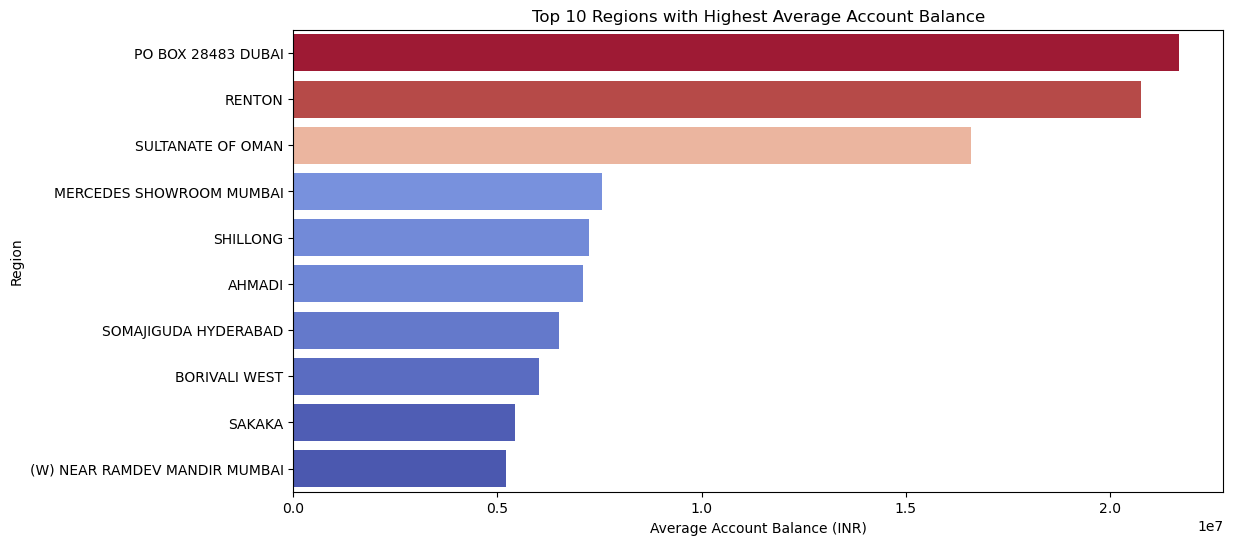

In [19]:
# Tính số dư tài khoản trung bình theo khu vực
avg_balance_by_location=df.groupby('CustLocation')['CustAccountBalance'].mean().reset_index()
avg_balance_by_location=avg_balance_by_location.sort_values(by='CustAccountBalance', ascending=False)
# Vẽ biểu đồ top 10 khu vực có số dư tài khoản trung bình cao nhất
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_balance_by_location['CustAccountBalance'] [:10], y=avg_balance_by_location['CustLocation'] [:10], hue=avg_balance_by_location['CustAccountBalance'] [:10], palette='coolwarm', legend=False)
plt.xlabel('Average Account Balance (INR)')
plt.ylabel('Region')
plt.title('Top 10 Regions with Highest Average Account Balance')
plt.show()

Biểu đồ top 10 khu vực có số dư tài khoản trung bình cao nhất:
- PO BOX 28483 DUBAI có số dư tài khoản trung bình cao nhất, vượt xa các khu vực khác (~21.69 triệu INR).
- RENTON và SULTANATE OF OMAN cũng có số dư trung bình cực cao, phản ánh khả năng đây là các khu vực có khách hàng VIP hoặc doanh nghiệp lớn.
- MERCEDEZ SHOWROOM MUMBAI cũng nằm trong top, cho thấy có thể đây là nơi giao dịch của các khách hàng có tài chính mạnh.
- Các khu vực như SHILLONG, TRICHY cũng có số dư trung bình cao, nhưng thấp hơn đáng kể so với các khu vực đứng đầu

Tóm lại, các khu vực quốc tế như Dubai, Oman có thể chứa tài khoản của khách hàng doanh nghiệp hoặc cá nhân có tài sản lớn, khu vực như Mercedes Showroom Mumbai có thể liên quan đến các khách hàng VIP hoặc có các giao dịch tài chính lớn. Một số khu vực có thể là nơi tập trung các tài khoản có mức tiết kiệm lớn hơn mức trung bình.


D. Phân tích dữ liệu theo thời gian
1. Tổng số giao dịch theo ngày/tháng

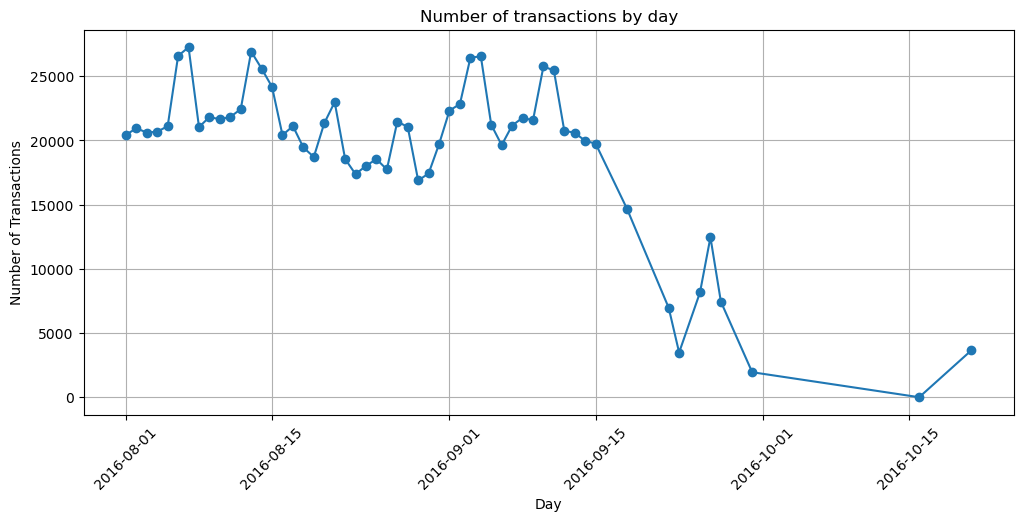

In [20]:
# Tạo cột tháng từ TransactionDate
df['TransactionMonth'] = df['TransactionDate'].dt.to_period('M')
# Tổng số giao dịch theo ngày
transactions_per_day = df.groupby('TransactionDate').size().reset_index(name='TotalTransactions')
# Vẽ biểu đồ xu hướng giao dịch theo ngày
plt.figure(figsize=(12, 5))
plt.plot(transactions_per_day['TransactionDate'], transactions_per_day['TotalTransactions'], marker='o', linestyle='-')
plt.xlabel('Day')
plt.ylabel('Number of Transactions')
plt.title('Number of transactions by day')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Biểu đồ số lượng giao dịch theo ngày cho thấy:
- Số lượng giao dịch duy trì ở mức cao trong tháng 8 và đầu tháng 9
- Có đỉnh giao dịch cao vào khoảng giữa tháng 8 và đầu tháng 9.
- Sau đó, khoảng từ giữa tháng 9, số lượng giao dịch ắt đầu giảm mạnh và tiếp tục giảm sâu vào tháng 10.

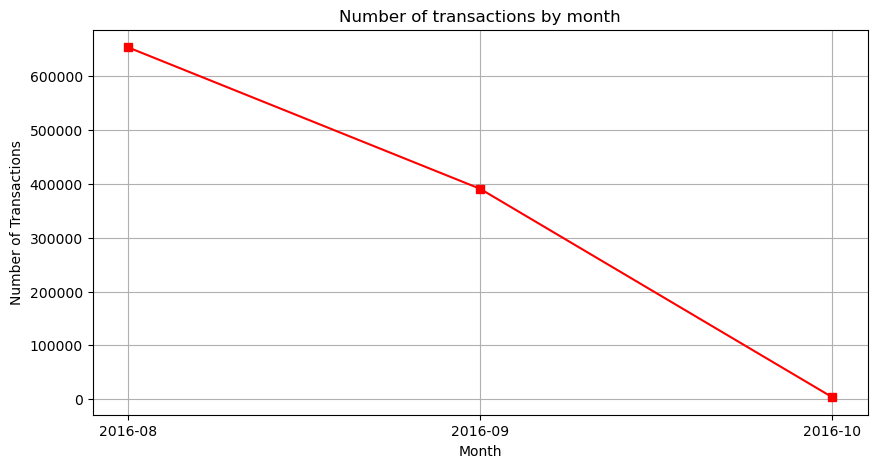

In [21]:
# Tổng số giao dịch theo tháng
transactions_per_month = df.groupby('TransactionMonth').size().reset_index(name='TotalTransactions')
# Vẽ biểu đồ xu hướng giao dịch theo tháng
plt.figure(figsize=(10, 5))
plt.plot(transactions_per_month['TransactionMonth'].astype(str), transactions_per_month['TotalTransactions'], 
         marker='s', linestyle='-', color='r')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Number of transactions by month')
plt.grid(True)
plt.show()

Biểu đồ số lượng giao dịch theo tháng:
- Tháng 8 có số lượng giao dịch cao nhất(653933 giao dịch).
- Tháng 9 có giảm đáng kể, giảm khoảng gần một nữa so với tháng 8(390975 giao dịch).
- Tháng 10 số lượng giao dịch giảm rất mạnh, gần như chạm mức tối thiếu(3659 giao dịch).

Qua 2 biểu đồ số lượng giao dịch theo ngày/tháng, có thể thấy mùa cao điểm giao dịch nằm vào tháng 8 là giai đoạn cao điểm nhất với số lượng giao dịch nhiều nhất, tháng 9 vẫn có nhưng bắt đầu có dấu hiệu suy giảm, tháng 10 có thể là giai đoạn kết thúc mùa cao điểm hoặc có sự kiện nào đó khiến giao dịch sụt giảm đột ngột.

Lý do cho mùa cao điểm này có thể là:
- Sự kiện đặc biệt trong tháng 8: có thể là thời gian có các chương trình khuyến mãi, giảm giá hoặc sự kiện kinh tế làm tăng số lượng giao dịch.
- Chu kỳ tài chính: một số công ty hoặc cá nhân có thể thực hiện nhiều giao dịch vào cuối quý tài chính hoặc kỳ kế toán.

Còn về số lượng giao dịch giảm mạnh vào tháng 10 có thế do một số nguyên nhân sau:
- Yếu tố mùa vụ hoặc chu kỳ kinh tế: nếu ngân hàng hoặc hệ thống tài chính có chu kỳ giao dịch cao điểm vào tháng 8,9 thì đến tháng 10 giao dịch sẽ giảm mạnh khi chu kỳ này kết thúc. Một số công ty và doanh nghiệp có thể đã hoàn thành việc quyết đoán tài chính vào tháng 9, làm giảm nhu cầu giao dịch vào tháng 10.
- Có thế có sự thay đổi trong chính sách giao dịch như tăng phí giao dịch, thay đổi hạn mức hoặc các quy định mới làm giảm số lượng giao dịch.
- Nếu trong tháng 10 có biến động kinh tế lớn, như khủng hoảng tài chính, lạm phát tăng cao hoặc sự kiện kinh tế tiêu cực, người dân và doanh nghiệp có thể hạn chế giao dịch để giảm rủi ro.
- Một số quốc gia có ngày lễ lớn hoặc kỳ nghỉ dài vào tháng 10, điều này có thể làm giảm nhu cầu giao dịch.

2. Sự tăng giảm bất thường vào các ngày cụ thể

In [22]:
# Tìm các ngày có biến động bất thường trong số lượng giao dịch
# Tính mức độ thay đổi phần trăm giữa các ngày
transactions_per_day['DailyChange'] = transactions_per_day['TotalTransactions'].pct_change() * 100
# Xác định các ngày có mức tăng hoặc giảm đột biến (trên 50% hoặc dưới -50%)
unusual_days = transactions_per_day[
    (transactions_per_day['DailyChange'] > 50) | (transactions_per_day['DailyChange'] < -50)]
unusual_days

,TransactionDate,TotalTransactions,DailyChange
47,2016-09-22,6971,-52.542719
48,2016-09-23,3485,-50.007173
49,2016-09-25,8164,134.261119
50,2016-09-26,12460,52.621264
52,2016-09-30,1951,-73.801531
53,2016-10-16,3,-99.846233
54,2016-10-21,3656,121766.666667


Những ngày có sự biến động về số lượng giao dịch rơi vào các ngày cụ thể trong tháng 9 chủ yếu liên quan đến các lễ hội tôn giao quan trognj và ngày nghỉ cuối tuần, ảnh hưởng đến hoạt động kinh doanh và giao dich ngân hàng.

3. Mối quan hệ giữa số dư tài khoản trung bình và tổng giá trị giao dịch theo từng tháng

In [23]:
# Tính tổng số dư tài khoản trung bình theo tháng
avg_balance_per_month = df.groupby('TransactionMonth')['CustAccountBalance'].mean().reset_index()
avg_balance_per_month.rename(columns={'CustAccountBalance': 'AverageAccountBalance'}, inplace=True)
# Tính tổng giá trị giao dịch theo tháng
total_transaction_value_per_month = df.groupby('TransactionMonth')['TransactionAmount (INR)'].sum().reset_index()
total_transaction_value_per_month.rename(columns={'TransactionAmount (INR)': 'TotalTransactionValue'}, inplace=True)
# Kết hợp hai bảng dữ liệu
monthly_comparison = pd.merge(avg_balance_per_month, total_transaction_value_per_month, on='TransactionMonth')

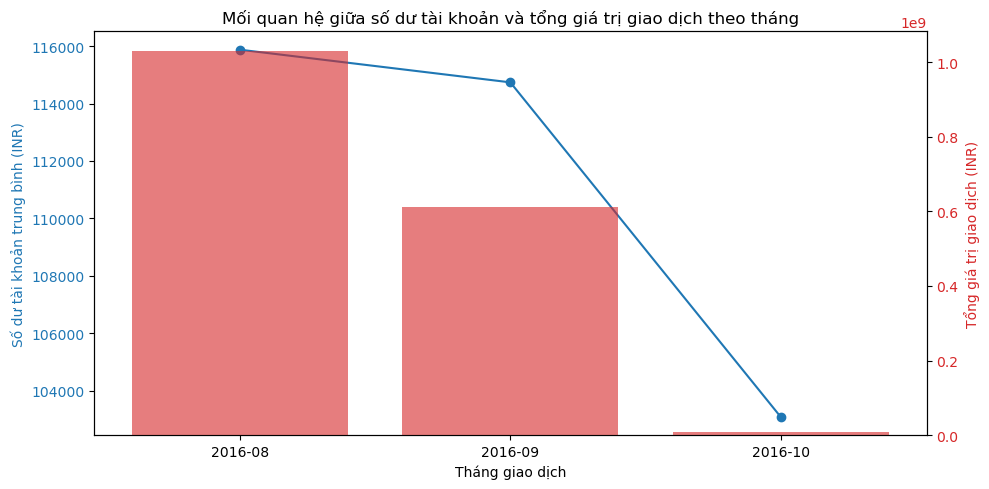

In [24]:
# Vẽ biểu đồ trực quan hóa mối quan hệ giữa số dư tài khoản và giá trị giao dịch theo tháng
fig, ax1 = plt.subplots(figsize=(10, 5))
# Vẽ đường cho số dư tài khoản trung bình
ax1.set_xlabel('Tháng giao dịch')
ax1.set_ylabel('Số dư tài khoản trung bình (INR)', color='tab:blue')
ax1.plot(monthly_comparison['TransactionMonth'].astype(str), monthly_comparison['AverageAccountBalance'], 
         marker='o', linestyle='-', color='tab:blue', label='Số dư tài khoản trung bình')
ax1.tick_params(axis='y', labelcolor='tab:blue')
# Vẽ cột cho tổng giá trị giao dịch
ax2 = ax1.twinx()
ax2.set_ylabel('Tổng giá trị giao dịch (INR)', color='tab:red')
ax2.bar(monthly_comparison['TransactionMonth'].astype(str), monthly_comparison['TotalTransactionValue'], 
        alpha=0.6, color='tab:red', label='Tổng giá trị giao dịch')
ax2.tick_params(axis='y', labelcolor='tab:red')
plt.title('Mối quan hệ giữa số dư tài khoản và tổng giá trị giao dịch theo tháng')
fig.tight_layout()
plt.show()

Từ biểu đồ ta thấy:
- Số dư tài khoản trung bình giảm nhẹ từ tháng 8 đến tháng 9 và giảm mạnh vào tháng 10: tháng 8-số dư trung bình cao nhất(~ 116000 INR), tháng 9-số dư trung bình giảm nhẹ(~ 114000 INR), tháng 10-số dư giảm mạnh(~ 103000 INR).
- Tổng giá trị giao dịch cũng giảm mạnh từ tháng 8 đến tháng 10: tháng 8-tống giá trị giao dịch đạt mức rất cao(hơn 1 tỷ INR), tháng 9-giảm gần một nửa(~ 612 triệu INR), tháng 10-sụt giảm cực mạnh(~ 7.6 triệu INR).

Mối quan hệ giữa hai yếu tố số dư tài khoản có xu hướng giảm dần những với tốc độ chậm hơn so với tổng giá trị giao dịch, giá trị giao dịch giảm nhanh hơn nhiều, cho thấy khách hàng có thể đang giảm tần suất giao dịch hoặc có sự thay đổi trong mô hình tiêu dùng.